In [1]:
import os, matplotlib.pyplot as plt, numpy as np, pandas as pd
import seaborn as sns#; sns.set()
from glob import glob
from datetime import datetime
from multiprocessing import Pool
from common_functions import nanopolish2regions, get_coverage, get_coverage2, get_coverage3

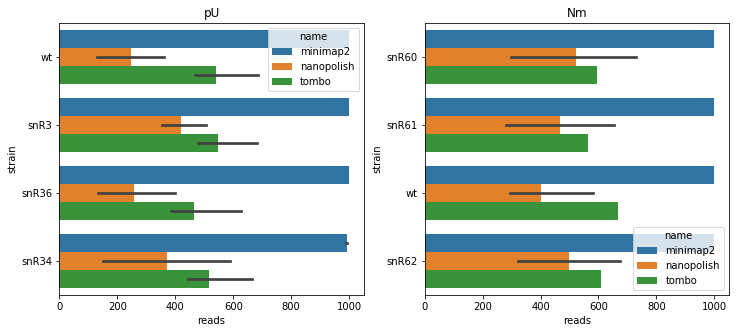

In [2]:
outdir = "results/rRNA.tombo_vs_nanopolish"
if not os.path.isdir(outdir): os.makedirs(outdir)

nn = 7
fnames1 = glob("guppy3.0.3.hac/RNA814001_*/fq.gz.bam.events.gz")
regions1 = [("25s", 2129, "snR3"), ("25s", 2133, "snR3"), ("25s", 2264, "snR3"), ("25s", 2826, "snR34"), ("25s", 2880, "snR34"), ("18s", 1187, "snR36"),  ]
sample2nanopolish1 = list(Pool(len(fnames1)).starmap(nanopolish2regions, [(fn, regions1, nn) for fn in fnames1])) #[nanopolish2regions(fn, regions1, nn) for fn in fnames1]

df4c1 = get_coverage(regions1, fnames1, sample2nanopolish1); df4c1
# load data from second KO experiment
fnames2 = glob("guppy3.0.3.hac/RNA345944_*/fq.gz.bam.events.gz")
regions2 = [('25s', 1133, 'snR61'), ('25s', 1888, 'snR62'), ('25s', 817, 'snR60'), ('25s', 908, 'snR60'), ]
sample2nanopolish2 = list(Pool(len(fnames2)).starmap(nanopolish2regions, [(fn, regions2, nn) for fn in fnames2]))

df4c2 = get_coverage(regions2, fnames2, sample2nanopolish2); df4c2

# write to excel
xls = pd.ExcelWriter(os.path.join(outdir, 'tombo_nanopolish_coverage.xlsx'))
df4c1.to_excel(xls, "pU")
df4c2.to_excel(xls, "Nm")
xls.close()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for ax, mod, (r, f, s2n) in zip((ax1, ax2), ("pU", "Nm"), ((regions1, fnames1, sample2nanopolish1), (regions2, fnames2, sample2nanopolish2))):
    df4 = get_coverage2(r, f, s2n); del df4["index"]; df4
    df4melt = df4.melt(["chrom", "pos", "name"], var_name="strain", value_name="reads")
    g=sns.barplot(x="reads", y="strain", hue="name", data=df4melt, ax=ax)
    ax.set_title(mod)
fig.savefig(os.path.join(outdir, "tombo_nanopolish_coverage.vert.pdf"))